<a href="https://colab.research.google.com/github/Vinaysh259/SOLA_Implementation/blob/master/Infersent_Implementation_direct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'content/gdrive/My Drive/Infersent'

In [3]:
%cd gdrive/My Drive/Infersent

/content/gdrive/My Drive/Infersent


In [4]:
!pwd

/content/gdrive/My Drive/Infersent


In [0]:
from random import randint
import numpy as np
import torch

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from models import InferSent
model_version = 1

params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load('encoder/infersent1.pickle'))
print(model)

InferSent(
  (enc_lstm): LSTM(300, 2048, bidirectional=True)
)


In [0]:
use_cuda = True
model = model.cuda() if use_cuda else model

In [0]:
W2V_PATH = 'dataset/GloVe/glove.840B.300d.txt' if model_version == 1 else '../dataset/fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [10]:

model.build_vocab_k_words(K=100000)

Vocab size : 100000


In [11]:
sentences = []
with open('encoder/samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [12]:

sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

In [13]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.6%)
Speed : 1724.3 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 9815


In [14]:
(model.encode(['the cat eats.'])[0])

array([ 0.13108402,  0.0095878 ,  0.00454947, ...,  0.02293481,
       -0.03814263, -0.01252608], dtype=float32)

In [0]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [16]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

0.816524

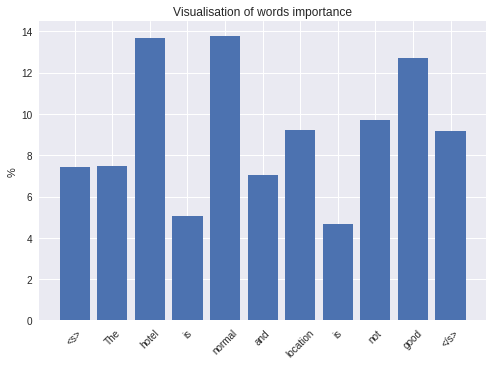

In [17]:
sentence = "The hotel is normal and location is not good"
_, _ = model.visualize(sentence)